In [170]:
import pandas as pd
df_saks = pd.read_csv('C:\\Users\\BGCNHK\\Desktop\\saks\\saks.csv')
df_saks
type(df_saks)
df_saks.sort_values(by='price', ascending=False)

,color,desc,desc_details,price,product_titles,style_id,sub_title
665,White,Shimmering beaded bag in a signature envelope ...,"Top flap with magnetic closure,Silvertone hard...",9500.0,Saint Laurent,400011249123,Small Lou Lou Beaded Shoulder Bag
518,Black,"In a curly leather design, this clutch makes f...","Top clasp closure,1 interior compartment,Leath...",8300.0,Bottega Veneta,400011081621,Large The Sponge Leather Clutch
3247,Multi,"In a structured box silhouette, this convertib...","Adjustable removable shoulder strap,Top handle...",6695.0,Dolce & Gabbana,400012167140,Dolce Box Floral Top Handle Bag
3661,Multi,NaN,Structured clush with scale design and Rio Gra...,6300.0,Silvia Furmanovich,400095911473,18K Yellow Gold And Rio Grandese Citrine Scale...
525,Burgmult,NaN,"Shiny gold- and silver-toned hardware,Leather ...",6000.0,Gucci,400011321005,Gucci Zumi Python Medium Top Handle Bag
...,...,...,...,...,...,...,...
3067,Black,Essential travel kit is all about comfort on t...,"Four-piece travel set,Travel pillow with infla...",30.0,Herschel Supply Co.,400012096006,Classics Amenity 4-Piece Travel Kit
2243,Multi,ONLY AT SAKS. Glossy open top with allover gri...,"Open top,Flat bottom,Lined,Vinyl,Imported,Doub...",30.0,Saks Fifth Avenue,400010191153,PVC Grid Pattern Logo Shopper
1191,Black,Sturdy webbed clips to strap any Storksak bag ...,"Brushed silver hardware,Grip-tape closures,1½""...",20.0,Storksak,415743938167,Diaper Bag Stroller Clips
2241,White,ONLY AT SAKS. Durable open top canvas tote fea...,"Open top,Interior logo,Lined,Cotton,Imported,D...",18.0,Saks Fifth Avenue,400010191208,Five-Day Calendar Canvas Tote Bag


In [167]:
# df_saks['price']
# df_saks['product_titles']
# df_saks.nunique()
# df_saks.head()
# df_saks.copy = df_saks.dropna(axis=0, how='any')
# df_saks.copy.nunique()
# df_saks[['product_titles','sub_title','color']].dropna(how='all').apply(pd.Series.value_counts)
# df_saks['product_titles'].value_counts().sort_values(ascending = False)
# df_saks['sub_title'].value_counts()
# df_saks.groupby('product_titles').count().sort_values(by=['sub_title'], ascending = False).head(20)
brand_mean = df_saks.groupby('product_titles',as_index=False)[['price']].mean()
brand_mean.sort_values(by='price', ascending=False)
# type(brand_mean)

,product_titles,price
108,Silvia Furmanovich,6300.000000
55,Judith Leiber Couture,3571.119403
3,Alaïa,2730.358696
89,Oscar de la Renta,2431.666667
21,Brunello Cucinelli,2346.750000
...,...,...
15,Barbour,85.000000
57,Kayu,82.500000
127,Uri Minkoff,65.620000
104,Saks Fifth Avenue,60.500000


In [154]:
brand_mean.columns

Index(['price'], dtype='object')

In [161]:
df_brand_product = df_saks.groupby('product_titles',as_index=False)[['sub_title']].count()
df_brand_product
# type(df_brand_product)
df1 = brand_mean.join(df_brand_product.set_index('product_titles'), on='product_titles')
df1.sort_values(by='price', ascending = False)

,product_titles,price,sub_title
108,Silvia Furmanovich,6300.000000,1
55,Judith Leiber Couture,3571.119403,67
3,Alaïa,2730.358696,46
89,Oscar de la Renta,2431.666667,12
21,Brunello Cucinelli,2346.750000,2
...,...,...,...
15,Barbour,85.000000,4
57,Kayu,82.500000,1
127,Uri Minkoff,65.620000,1
104,Saks Fifth Avenue,60.500000,8


In [37]:
%matplotlib inline

In [38]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

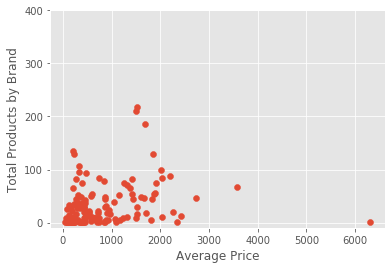

In [263]:
fig, ax = plt.subplots()
# fig1 = plt.figure()
# ax = plt.subplots()
# fig = plt.figure()
# ax = plt.subplots()
plt.scatter(df1['price'], df1['sub_title'])
plt.xlabel('Average Price')
plt.ylabel('Total Products by Brand')
ax.set_yticks(range(0,500,100))
plt.show()
# fig1.savefig('4.png', transparent=True)

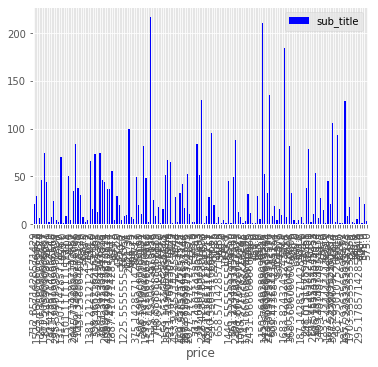

In [186]:
df1[['price','sub_title']].plot.bar(x='price', y='sub_title',color='b')

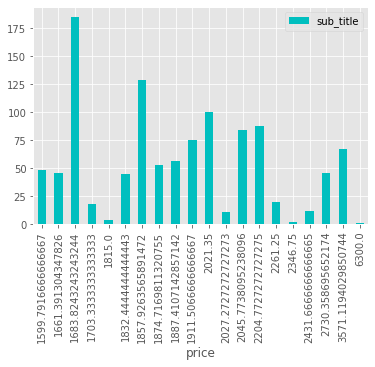

In [198]:
df1[['price','sub_title']].sort_values(by='price', ascending = False).head(20)[::-1].plot.bar(x='price', y='sub_title',color='c')

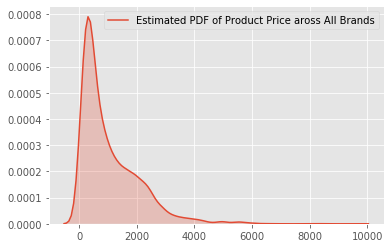

In [201]:
import seaborn as sns
sns.kdeplot(df_saks['price'], shade=True, label='Estimated PDF of Product Price aross All Brands')

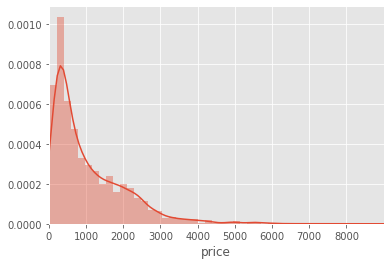

In [268]:
fig, ax = plt.subplots()
sns.distplot(df_saks['price'], ax=ax)
ax.set_xlim(0,9000)
ax.set_xticks(range(0,9000,1000))
plt.show()